In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from utils.plotting_utils import *

In [3]:
df = pd.read_csv('../data/german_credit_data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

In [4]:
job_dic = {
    0: 'unskilled non res',
    1: 'unskilled resident',
    2: 'skilled',
    3: 'highly skilled'
}
df.job = df.job.map(job_dic)

In [5]:
numerical_features = ['age', 'credit_amount', 'duration']
categorical_features = ['sex', 'job', 'housing', 'saving_accounts', 'checking_account', 'purpose']
target = 'risk'

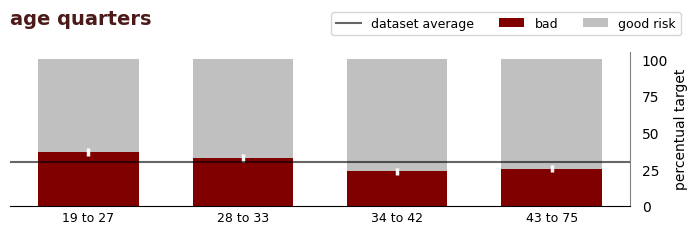

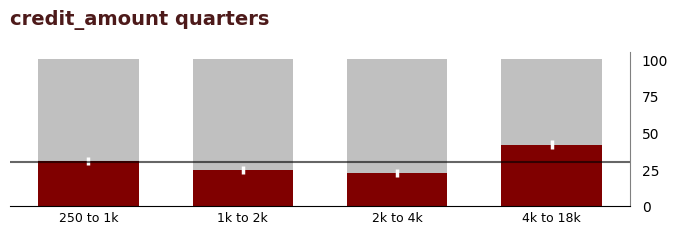

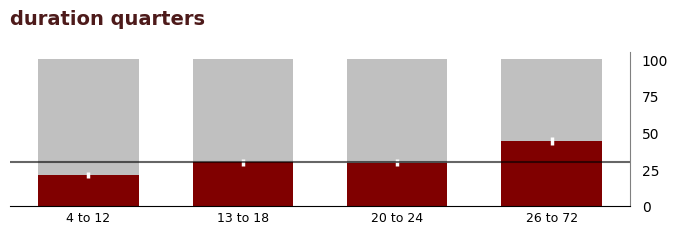

In [6]:
hide_labels = False
for feature in numerical_features:
    plot_stacked_risk(df, feature, is_numerical = True, figsize = (8, 2), hide_labels = hide_labels)
    hide_labels = True

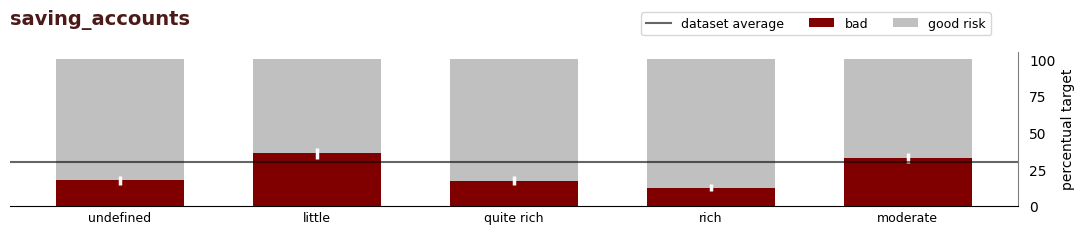

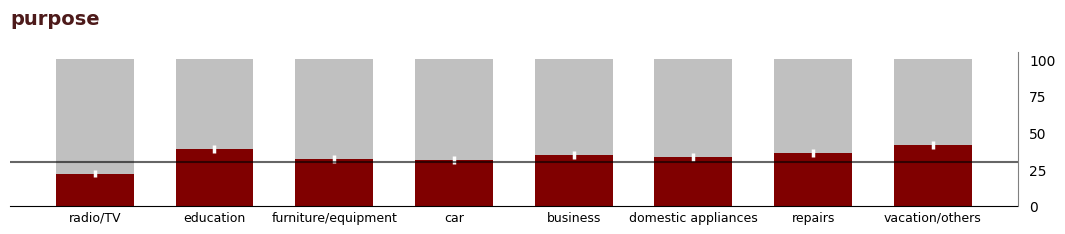

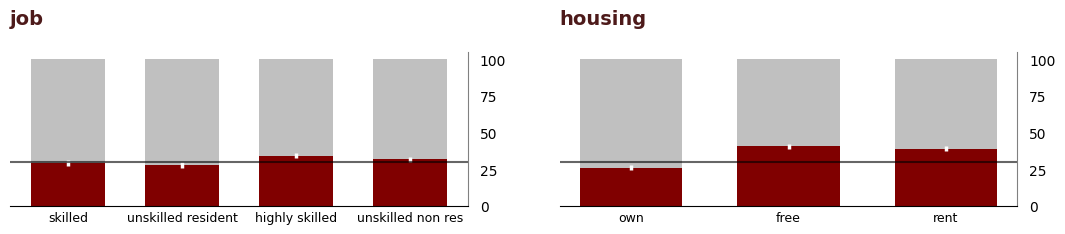

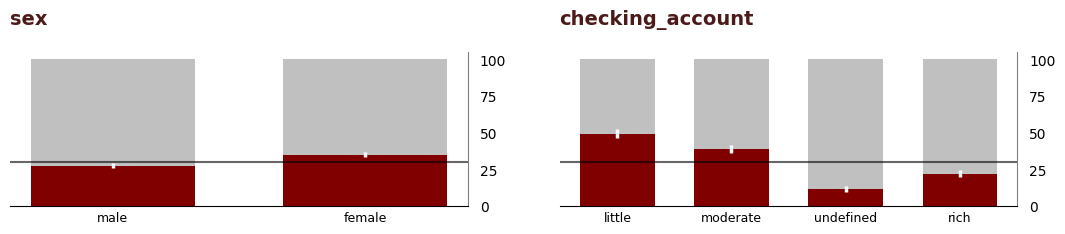

In [7]:


figsize = (13, 2)

plot_stacked_risk(df, 'saving_accounts', figsize = figsize)
plot_stacked_risk(df, 'purpose', figsize = figsize, hide_labels=True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = figsize)
plot_stacked_risk(df, 'job', ax = ax1, hide_labels=True)
plot_stacked_risk(df, 'housing', ax = ax2, hide_labels=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = figsize)
plot_stacked_risk(df, 'sex', ax = ax1, hide_labels=True)
plot_stacked_risk(df, 'checking_account', ax = ax2, hide_labels=True)



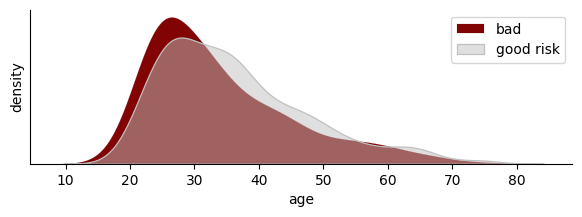

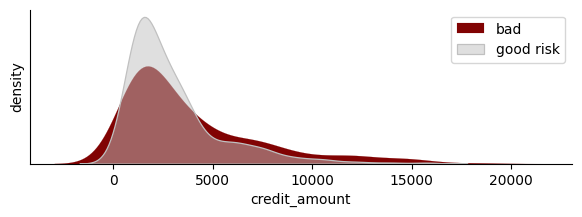

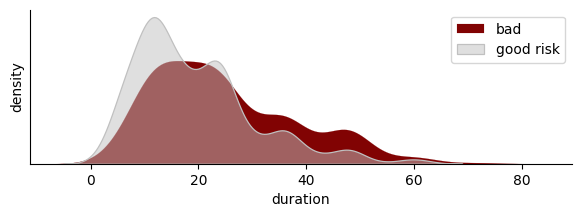

In [8]:


for feature in numerical_features:
    kde(feature, df)

In [9]:
df.fillna('undefined', inplace=True)

In [10]:
df['target'] = df.risk.map({'good': 0, 'bad': 1})

In [11]:
df['duration_per_credit'] = df['credit_amount'] / df['duration'] 

In [12]:
## pearson correlation between risk and numerical features
df[numerical_features  + ['target']].corr()['target'].sort_values(ascending=False)

target           1.000000
duration         0.214927
credit_amount    0.154739
age             -0.091127
Name: target, dtype: float64

In [13]:
df.job = df.job.astype(str)

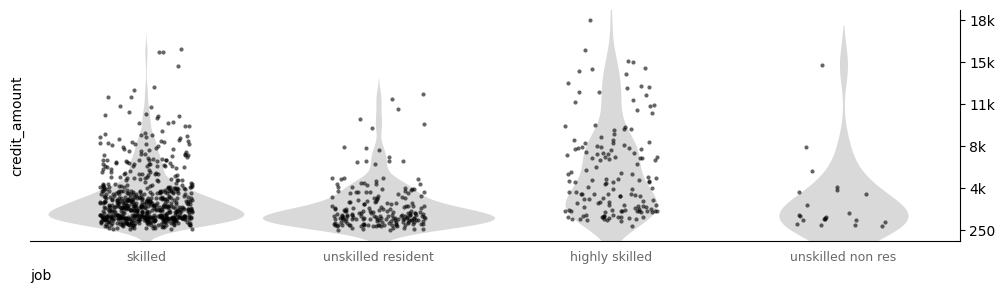

In [24]:

categorical_feature = 'job'
numerical_feature = 'credit_amount'
stripplot(categorical_feature, numerical_feature, df)

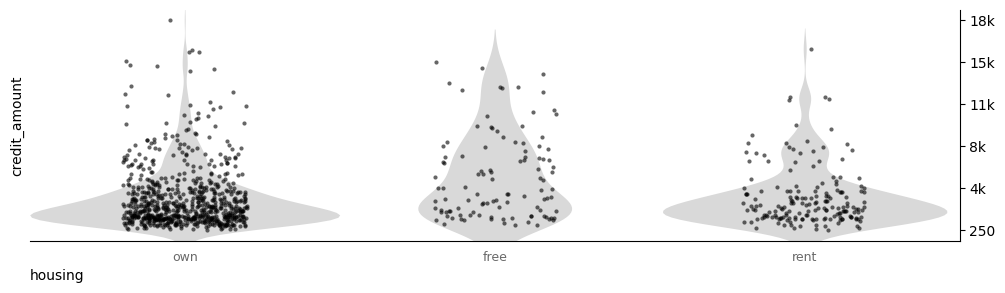

In [25]:

categorical_feature = 'housing'
numerical_feature = 'credit_amount'
stripplot(categorical_feature, numerical_feature, df)

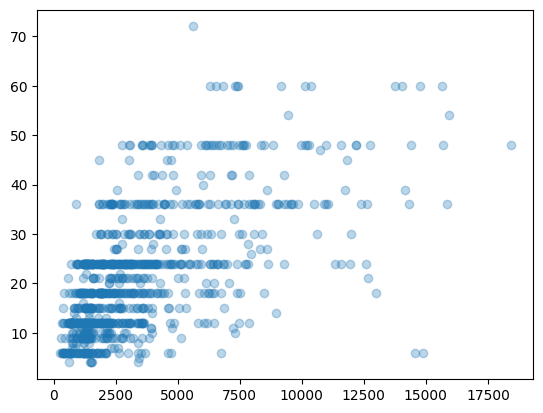

In [19]:
plt.scatter(df.credit_amount, df.duration, cmap = 'viridis', alpha = 0.3)